<a href="https://colab.research.google.com/github/vasukondreddy/PyTorch/blob/main/6_ANN_Fashion_MINST_PyTorch_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt



In [3]:
# set random for reproducibility
torch.manual_seed(42)

In [4]:
# check for GPU
device =torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [6]:
df=pd.read_csv('fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


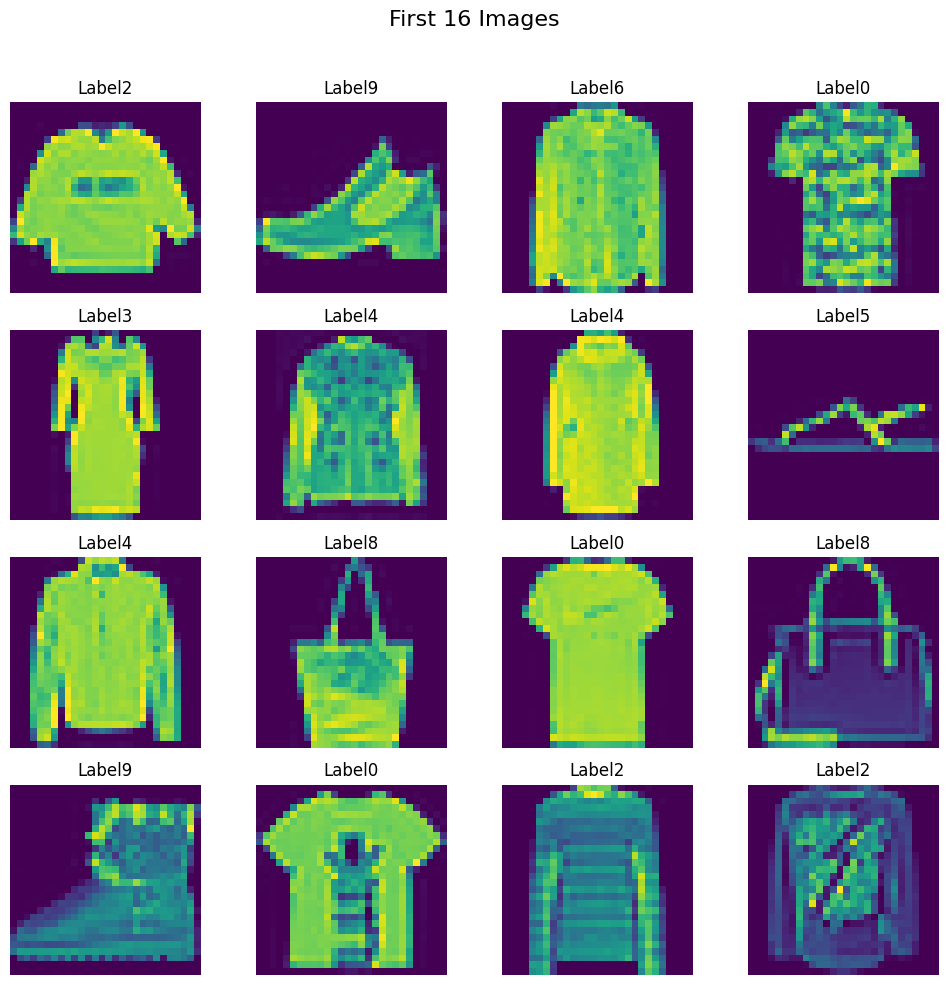

In [7]:
# create a 4x4 grid of images

fig,axes=plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 Images",fontsize=16)

# plot the first 16 images from the dataset

for i, ax in enumerate(axes.flat):
  img=df.iloc[i,1:].values.reshape(28,28) # reshape to 28x28
  ax.imshow(img) # Display in grayscale
  ax.axis('off') # remove axis for a cleaner look
  ax.set_title(f"Label{df.iloc[i,0]}") # show the label

plt.tight_layout(rect=[0,0,1,0.96]) # adjust layout to fit the title
plt.show()

In [8]:
# train test split
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
# scaling teh features
X_train=X_train/255.0 # 255 is the max value in the data set
# we have different values in dset so, converting in range 0-1 for better use
X_test=X_test/255.0


In [11]:
X_train

array([[0.        , 0.        , 0.00784314, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
# crate CustomData class
class CustomDataset(Dataset):

  def __init__(self,features,labels):

    self.features=torch.tensor(features, dtype=torch.float32) # we will se features in float
    self.labels=torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):
    return self.features[index],self.labels[index]



In [13]:
# create train_dataset object

train_dataset=CustomDataset(X_train,y_train)

In [14]:
len(train_dataset)

8333

In [15]:
train_dataset[0] # train dataset first label

(tensor([0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.3804, 0.5255, 0.1922, 0.1608, 0.1451, 0.1529, 0.3059, 0.5333,
         0.2588, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0706,
         0.3569, 0.6157, 0.5098, 0.6667, 0.7882, 0.7137, 0.7608, 0.7216, 0.7608,
         0.5608, 0.5843, 0.6471, 0.4941, 0.1608, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275, 0.5765,
         0.5922, 0.5255, 0.4196, 0.3412, 0.4118, 0.5686, 0.6000, 0.6314, 0.6157,
         0.4549, 0.3882, 0.3725, 0.4353, 0.5765, 0.6902, 0.6078, 0.0784, 0.0000,
         0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0941, 0.6745,
         0.4353, 0.3647, 0.3882, 0.3804, 0.4118, 0.3725, 0.4039, 0.4863, 0.3882,
         0.3725, 0.3569, 0.4039, 0.4196, 0.3961, 0.3725, 0.3216, 0.4784, 0.6157,
         0.0078, 0.0000, 0.0

In [16]:
# create test_dataset object

test_dataset=CustomDataset(X_test,y_test)

In [18]:
# create train and test loader
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True,pin_memory=True)
test_loader= DataLoader(test_dataset,batch_size=32,shuffle=False,pin_memory=True)
# pin memory used to execution(run) fast

In [19]:
# define NN Class

class MyNN(nn.Module):

  def __init__(self,num_features):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(num_features,128),# from input data filtering 128 features to next layer ReLu(hidden layer 1)
        nn.ReLU(),
        nn.Linear(128,64), # from 128 filtering 64 to next hidden layer
        nn.ReLU(),
        nn.Linear(64,10) # from 64 featues filtering 10 features giving as output
    )
 # in pytorch internally entropy is loss so No need to explicitly deinfe "Softmmax"

  def forward(self,x):
    return self.model(x)




In [20]:
# set learnnig rate and epochs

epochs=100
learning_rate=0.1


In [21]:
# instatiate the model
model=MyNN(X_train.shape[1])
model=model.to(device)

# loss fun
criterion =nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(),lr=learning_rate)


In [22]:
len(train_loader)

261

In [23]:
# training loop
for epoch in range(epochs):

  total_epoch_loss=0

  for batch_features ,batch_labels in train_loader:

    # move data to gpu
    batch_features ,batch_labels = batch_features.to(device),batch_labels.to(device)
    # forward pass
    outputs=model(batch_features)

    # loass calculate
    loss=criterion(outputs,batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch+1}, Loss: {avg_loss}')

Epoch: 1, Loss: 1.0771580072426705
Epoch: 2, Loss: 0.6243735893247685
Epoch: 3, Loss: 0.5305618590664589
Epoch: 4, Loss: 0.4738158607619932
Epoch: 5, Loss: 0.44917499807830974
Epoch: 6, Loss: 0.42721627778248766
Epoch: 7, Loss: 0.39653950244530867
Epoch: 8, Loss: 0.38605580133496575
Epoch: 9, Loss: 0.3623363452167803
Epoch: 10, Loss: 0.3536520889492784
Epoch: 11, Loss: 0.34040670522213895
Epoch: 12, Loss: 0.3227545751751154
Epoch: 13, Loss: 0.3148383688024634
Epoch: 14, Loss: 0.3002446216184974
Epoch: 15, Loss: 0.2952015722791354
Epoch: 16, Loss: 0.2758192692765559
Epoch: 17, Loss: 0.2796716171092001
Epoch: 18, Loss: 0.2763409039640792
Epoch: 19, Loss: 0.25652336196481496
Epoch: 20, Loss: 0.25537883981320136
Epoch: 21, Loss: 0.24272066860734504
Epoch: 22, Loss: 0.23319721240478913
Epoch: 23, Loss: 0.22119489457757993
Epoch: 24, Loss: 0.2236646344649723
Epoch: 25, Loss: 0.20915327862019284
Epoch: 26, Loss: 0.20530555262747738
Epoch: 27, Loss: 0.20327975349393726
Epoch: 28, Loss: 0.19671

In [24]:
# set model to eval model
model.eval() #

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [25]:
len(test_loader)

66

In [27]:
# evaluation code

total=0
correct=0
with torch.no_grad():

  for batch_features,batch_labels in test_loader:

    # move data to gpu
    batch_features ,batch_labels = batch_features.to(device),batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs,1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total) # accuracy increases in GPU compatred to CPU


0.8646833013435701
